In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [16]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [17]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [18]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    #dyf = y - tx.dot(w)
    #mse = np.sum(dyf*dyf)/(2*N)
    dyf = y - tx.dot(w)
    mae = np.sum(np.fabs(dyf))/N
    
    #raise NotImplementedError
    #return mse
    return mae

# 2 Grid Search

Fill in the function `grid_search()` below:

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(losses.shape[0]):
        for j in range(losses.shape[1]):
            losses[i][j] = compute_loss(y,tx,np.array([w0[i],w1[j]]))
            
    #raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.010 seconds


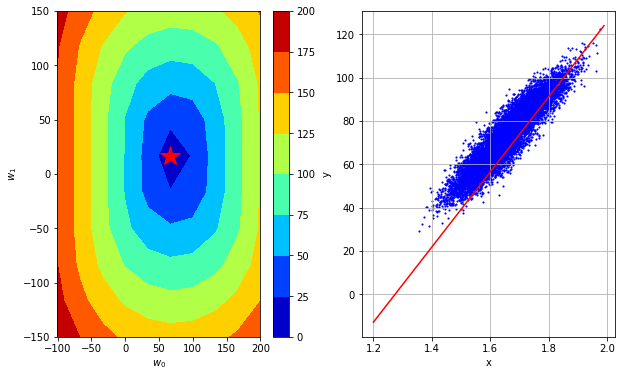

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [38]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    result = -1*np.dot(np.transpose(tx),np.sign(e))/N
    return result
    #raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [39]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = compute_gradient(y,tx,w)
        N = y.shape[0]
        e = y - tx.dot(w)
        loss = ((np.transpose(e)).dot(e))/(2*N)
        # ***************************************************
        w = w - gamma*grad
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [40]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=0.7, w1=-1.846274244599044e-15
Gradient Descent(1/49): loss=2741.175967357693, w0=1.4, w1=-3.692548489198088e-15
Gradient Descent(2/49): loss=2690.60522195622, w0=2.0999999999999996, w1=-5.538822733797132e-15
Gradient Descent(3/49): loss=2640.524476554746, w0=2.8, w1=-7.385096978396176e-15
Gradient Descent(4/49): loss=2590.933731153272, w0=3.5, w1=-9.231371222995221e-15
Gradient Descent(5/49): loss=2541.832985751799, w0=4.2, w1=-1.1077645467594266e-14
Gradient Descent(6/49): loss=2493.2222403503256, w0=4.9, w1=-1.292391971219331e-14
Gradient Descent(7/49): loss=2445.101494948852, w0=5.6000000000000005, w1=-1.4770193956792355e-14
Gradient Descent(8/49): loss=2397.470749547378, w0=6.300000000000001, w1=-1.66164682013914e-14
Gradient Descent(9/49): loss=2350.3300041459047, w0=7.000000000000001, w1=-1.8462742445990445e-14
Gradient Descent(10/49): loss=2303.679258744431, w0=7.700000000000001, w1=-2.030901669058949e-14
Gradient Descent(11/49

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [43]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    result = -1*np.dot(np.transpose(tx),np.sign(e))/N
    return result
    #raise NotImplementedError
    
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    ws = [initial_w]
    w = initial_w
    losses = []
    for minibatch_y, minibatch_x in batch_iter(y,tx,32):
        ### Compute Loss ###
        e = minibatch_y - minibatch_x.dot(w)
        N = minibatch_y.shape[0]
        loss = ((np.transpose(e)).dot(e))/(2*N)
        
        ### Compute w ###
        gradient = compute_stoch_gradient(minibatch_y,minibatch_x,w)
        w = w - gamma*gradient
        
        ws.append(w)
        losses.append(loss)
    
    # ***************************************************
    #raise NotImplementedError
    return losses, ws

In [44]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.001 seconds


In [45]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)